In [1]:
import pandas as pd
from datasets import Dataset, DatasetDict
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

c:\Users\Admin\OneDrive\Desktop\GENAI\NLP_mpr\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("Downloading NLTK resources (punkt, averaged_perceptron_tagger, wordnet)...")
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
print("NLTK resources downloaded.")

NLTK resources downloaded.


In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank POS tags to WordNet tags for lemmatization."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Default to noun

In [6]:
def demonstrate_traditional_nlp_steps(text):
    """
    Applies and prints the output of 5 traditional NLP steps on a sample text.
    """
    print(f"\n--- Demonstrating 5 Steps on Sample Text ---\nOriginal Text: '{text}'\n")

    # 1. Sentence Boundary Identification
    sentences = sent_tokenize(text)
    print(f"1. Sentence Identification:\n   {sentences}\n")

    # We'll process the first sentence for the remaining steps
    first_sentence = sentences[0]

    # 2. Tokenization (Word Tokenization)
    tokens = word_tokenize(first_sentence)
    print(f"2. Word Tokenization:\n   {tokens}\n")

    # 3. Syntactic Analysis (Part-of-Speech Tagging)
    pos_tags = nltk.pos_tag(tokens)
    print(f"3. Syntactic Analysis (POS Tagging):\n   {pos_tags}\n")

    # 4. Lemmatization (requires POS tags for accuracy)
    lemmatized_tokens = []
    for word, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_tokens.append(lemma)
    print(f"4. Lemmatization (context-aware):\n   {lemmatized_tokens}\n")

    # 5. Semantic Analysis (WordNet Synonyms)
    # Let's find synonyms for the first noun found in the sentence
    first_noun = None
    for word, tag in pos_tags:
        if tag.startswith('NN'):
            first_noun = word
            break
    
    if first_noun:
        synonyms = []
        for syn in wordnet.synsets(first_noun):
            for lemma in syn.lemmas():
                if lemma.name() not in synonyms:
                    synonyms.append(lemma.name())
        print(f"5. Semantic Analysis (Synonyms for '{first_noun}' using WordNet):\n   {synonyms[:5]} ...\n")
    else:
        print("5. Semantic Analysis: No noun found to demonstrate synonym lookup.\n")


In [9]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [10]:

"""
Main function to run the data loading and preprocessing.
"""
# --- For Demonstration Purposes ---
sample_text = "My credit cards are not working and the app crashes frequently."
demonstrate_traditional_nlp_steps(sample_text)

# --- The rest of your script for processing the actual dataset ---
# NOTE: Applying these steps to the full dataset would be very slow and is
#       not recommended for training the final transformer model. This is
#       primarily for fulfilling the documentation requirement.

print("\n--- Proceeding with the original script for dataset preparation ---")

# This section is your original script, which correctly prepares the data for DistilBERT
# We will not apply the traditional steps to the whole dataset here.

# --- Load Data from CSV (your original code) ---
try:
    train_df = pd.read_csv("dataset/train.csv")
    test_df = pd.read_csv("dataset/test.csv")
except FileNotFoundError:
    print("\nERROR: Could not find 'train.csv' or 'test.csv'.")
    

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
raw_datasets = DatasetDict({'train': train_dataset, 'test': test_dataset})
print("\nSuccessfully loaded data from local CSVs.")
print(raw_datasets)



--- Demonstrating 5 Steps on Sample Text ---
Original Text: 'My credit cards are not working and the app crashes frequently.'

1. Sentence Identification:
   ['My credit cards are not working and the app crashes frequently.']

2. Word Tokenization:
   ['My', 'credit', 'cards', 'are', 'not', 'working', 'and', 'the', 'app', 'crashes', 'frequently', '.']

3. Syntactic Analysis (POS Tagging):
   [('My', 'PRP$'), ('credit', 'NN'), ('cards', 'NNS'), ('are', 'VBP'), ('not', 'RB'), ('working', 'VBG'), ('and', 'CC'), ('the', 'DT'), ('app', 'NN'), ('crashes', 'NNS'), ('frequently', 'RB'), ('.', '.')]

4. Lemmatization (context-aware):
   ['My', 'credit', 'card', 'be', 'not', 'work', 'and', 'the', 'app', 'crash', 'frequently', '.']

5. Semantic Analysis (Synonyms for 'credit' using WordNet):
   ['recognition', 'credit', 'credit_entry', 'deferred_payment', 'course_credit'] ...


--- Proceeding with the original script for dataset preparation ---

Successfully loaded data from local CSVs.
DatasetD

In [12]:
# Define the same category map from Phase 1
category_map = {
    'activate_my_card': 'Billing Question','card_payment_fee_charged': 'Billing Question','card_payment_not_recognised': 'Billing Question','card_payment_wrong_exchange_rate': 'Billing Question','cash_withdrawal_charge': 'Billing Question','cash_withdrawal_not_recognised': 'Billing Question','exchange_charge': 'Billing Question','exchange_rate': 'Billing Question','exchange_via_app': 'Billing Question','fee_applied': 'Billing Question','fiat_currency_support': 'Billing Question','pending_card_payment': 'Billing Question','pending_cash_withdrawal': 'Billing Question','pending_top_up': 'Billing Question','pending_transfer': 'Billing Question','top_up_by_bank_transfer_charge': 'Billing Question','top_up_by_card_charge': 'Billing Question','top_up_failed': 'Billing Question','top_up_limits': 'Billing Question','top_up_reverted': 'Billing Question','transaction_charged_twice': 'Billing Question','transfer_fee_charged': 'Billing Question','beneficiary_not_allowed': 'Billing Question','card_arrival': 'Billing Question','card_delivery_estimate': 'Billing Question','card_linking': 'Billing Question','card_not_working': 'Billing Question','decline_card_payment': 'Billing Question','declined_cash_withdrawal': 'Billing Question','declined_transfer': 'Billing Question','direct_debit_payment_not_recognised': 'Billing Question','failed_transfer': 'Billing Question','topping_up_by_card': 'Billing Question','transfer_not_received_by_recipient': 'Billing Question','transfer_timing': 'Billing Question','wrong_amount_of_cash_received': 'Billing Question','wrong_exchange_rate_for_cash_withdrawal': 'Billing Question','cancel_transfer': 'Billing Question','request_refund': 'Billing Question',
    'app_does_not_work': 'Technical Issue','face_id_not_working': 'Technical Issue','fingerprint_not_working': 'Technical Issue','passcode_forgotten': 'Technical Issue','pin_blocked': 'Technical Issue','unable_to_verify_identity': 'Technical Issue','verify_my_identity': 'Technical Issue','getting_physical_card': 'Technical Issue',
    'ATMs_support': 'General Inquiry','account_blocked': 'General Inquiry','age_limit': 'General Inquiry','apple_pay_or_google_pay': 'General Inquiry','atm_support': 'General Inquiry','automatic_top_up': 'General Inquiry','balance_not_updated_after_bank_transfer': 'General Inquiry','balance_not_updated_after_cheque_or_cash_deposit': 'General Inquiry','card_about_to_expire': 'General Inquiry','card_acceptance': 'General Inquiry','card_swallowed': 'General Inquiry','change_pin': 'General Inquiry','contactless_not_working': 'General Inquiry','country_support': 'General Inquiry','disposable_card_limits': 'General Inquiry','edit_personal_details': 'General Inquiry','get_disposable_virtual_card': 'General Inquiry','get_physical_card': 'General Inquiry','getting_spare_card': 'General Inquiry','how_do_I_report_fraud': 'General Inquiry','lost_or_stolen_card': 'General Inquiry','lost_or_stolen_phone': 'General Inquiry','order_physical_card': 'General Inquiry','supported_cards_and_currencies': 'General Inquiry','verify_source_of_funds': 'General Inquiry','verify_top_up': 'General Inquiry','virtual_card_not_working': 'General Inquiry','what_are_my_limits': 'General Inquiry','what_is_a_disposable_virtual_card': 'General Inquiry','what_is_my_pin': 'General Inquiry','why_verify_identity': 'General Inquiry','terminate_account': 'General Inquiry'
}

In [13]:
# Define our new labels and create mappings for label encoding
new_labels = ['Billing Question', 'Technical Issue', 'General Inquiry']
label2id = {label: i for i, label in enumerate(new_labels)}
id2label = {i: label for i, label in enumerate(new_labels)}

In [14]:
def remap_labels_from_csv(example):
    # The CSV has a 'category' column with text labels
    original_label_name = example['category']
    new_label_name = category_map.get(original_label_name, "Unmapped")
    example['label'] = label2id.get(new_label_name)
    return example

In [15]:
processed_datasets = raw_datasets.map(remap_labels_from_csv, remove_columns=['category'])
print("\nLabels have been successfully remapped to our 3 categories.")

Map: 100%|██████████| 3080/3080 [00:00<00:00, 11364.25 examples/s]


Labels have been successfully remapped to our 3 categories.



--- 2. Analyzing Category Distribution ---
Distribution of new categories in the training set:
label
Billing Question    5422
Technical Issue      426
General Inquiry     2872
Name: count, dtype: int64


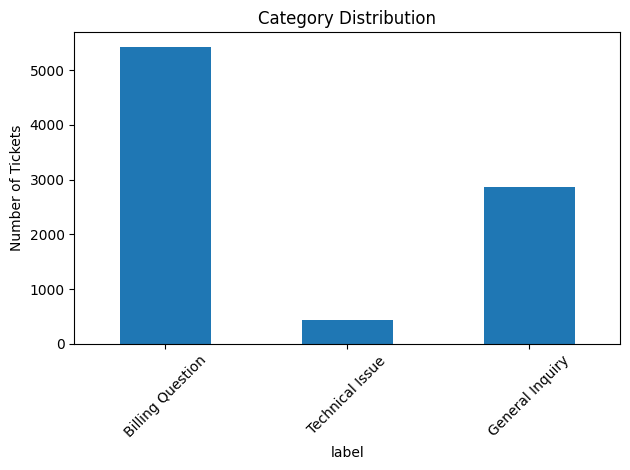

In [16]:
print("\n--- 2. Analyzing Category Distribution ---")
# This part remains the same
train_df_processed = pd.DataFrame(processed_datasets['train'])
label_counts = train_df_processed['label'].value_counts().sort_index()
label_counts.index = label_counts.index.map(lambda i: id2label[i])
print("Distribution of new categories in the training set:")
print(label_counts)
label_counts.plot(kind='bar', title='Category Distribution')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from transformers import AutoTokenizer

In [18]:
print("\n--- 3. Tokenizing the Dataset ---")
# This part also remains the same
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)


--- 3. Tokenizing the Dataset ---


In [19]:
def tokenize_function(examples):
        return tokenizer(examples["text"], truncation=True, padding="max_length")

In [20]:
tokenized_datasets = processed_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")

Map: 100%|██████████| 3080/3080 [00:00<00:00, 3382.99 examples/s]


In [21]:
print("\nDataset tokenized and formatted for training:")
print(tokenized_datasets["train"][0])


print("\n--- 4. Saving Processed Dataset ---")
tokenized_datasets.save_to_disk("banking77-processed")
print("\nProcessed dataset saved to the 'banking77-processed' directory.")
print("\nPhase 2 is complete! We are now ready for model training.")


Dataset tokenized and formatted for training:
{'labels': tensor(0), 'input_ids': tensor([ 101, 1045, 2572, 2145, 3403, 2006, 2026, 4003, 1029,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 